In [1]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
# Import Datasets
file_path = '/Users/MichaelLy/Github Projects/Heart Disease Project/BRFSS 2015.csv'

# Store Dataset
heart_disease_data = pd.read_csv(file_path)

# Read Dataframe
pd.set_option('display.max_columns', 500)
heart_disease_data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [3]:
# Data Preprocessing
# Select Specific Columns
heart_disease_selected_data = heart_disease_data[['_MICHD', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', 'DIABETE3', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

heart_disease_selected_data.head()

,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,2.0,2.0,1.0,1.0,4018.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,2.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,NaN,1.0,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,9.0,9.0,9.0,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,2.0,2.0,1.0,1.0,2819.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,2.0,1.0,2.0,1.0,2437.0,2.0,2.0,3.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [4]:
# Check for and Drop Missing Values
total_missing_values = heart_disease_selected_data.isnull().sum().sum()
print(f"Total missing values: {total_missing_values}")

heart_disease_selected_data = heart_disease_selected_data.dropna()

Total missing values: 129395


In [5]:
# Modify and Clean Specific Columns
# _MICHD: Change 2 to 0 Because This Indicates Did Not Have MI or CHD
heart_disease_selected_data['_MICHD'] = heart_disease_selected_data['_MICHD'].replace({2: 0})

# _RFHYPE5: Change 1 to 0 to Represetnt No High Blood Pressure and 2 to 1 to Represent High Blood Pressure
heart_disease_selected_data['_RFHYPE5'] = heart_disease_selected_data['_RFHYPE5'].replace({1:0, 2:1})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._RFHYPE5 != 9]

# TOLDHI2: Change 2 to 0 for No, Remove 7s (Dont Knows) and 9s (Refused)
heart_disease_selected_data['TOLDHI2'] = heart_disease_selected_data['TOLDHI2'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.TOLDHI2 != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.TOLDHI2 != 9]

# _CHOLCHK: Change 3 to 0 and 2 to 0 for Not Checked Cholesterol in Past 5 Years and Remove 9s (Refused)
heart_disease_selected_data['_CHOLCHK'] = heart_disease_selected_data['_CHOLCHK'].replace({3:0,2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._CHOLCHK != 9]

# _BMI5: No Changes, Note: BMI * 100. I.E., BMI of 4018 is 40.18
heart_disease_selected_data['_BMI5'] = heart_disease_selected_data['_BMI5'].div(100).round(0)

# SMOKE100: Change 2 to 0 for No, Remove 7s (Dont Knows) and 9s (Refused)
heart_disease_selected_data['SMOKE100'] = heart_disease_selected_data['SMOKE100'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.SMOKE100 != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.SMOKE100 != 9]

# CVDSTRK3: Change 2 to 0 for No, Remove 7s (Dont Knows) and 9s (Refused)
heart_disease_selected_data['CVDSTRK3'] = heart_disease_selected_data['CVDSTRK3'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.CVDSTRK3 != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.CVDSTRK3 != 9]

# DIABETE3: 0 for No Diabetes or Only During Pregnancy, 1 for Pre-Diabetes or Borderline Diabetes, 2 for Yes Diabetes, Remove 7s (Don't Knows) and 9s (Refused)
heart_disease_selected_data['DIABETE3'] = heart_disease_selected_data['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.DIABETE3 != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.DIABETE3 != 9]

# _TOTINDA: 1 for Physical Activity, Change 2 to 0 for No Physical Activity, Remove 9s (Don't Know/Refused)
heart_disease_selected_data['_TOTINDA'] = heart_disease_selected_data['_TOTINDA'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._TOTINDA != 9]

# _FRTLT1: Change 2 to 0 for No Fruit Consumed per Day, 1 for Consumed 1 or More Pieces of Fruit per Day, Remove 9s (Don't Know/Missing)
heart_disease_selected_data['_FRTLT1'] = heart_disease_selected_data['_FRTLT1'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._FRTLT1 != 9]

# _VEGLT1: Change 2 to 0 for No Vegetables Consumed per Day, 1 for Consumed 1 or More Pieces of Vegetables per Day, Remove 9s (Don't Know/Missing)
heart_disease_selected_data['_VEGLT1'] = heart_disease_selected_data['_VEGLT1'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._VEGLT1 != 9]

In [6]:
# _RFDRHV5: Change 1 to 0 (1 was No for Heavy Drinking), Change 2 to 1 (2 was Yes for Heavy Drinking), Remove 9s (Don't Know/Missing)
heart_disease_selected_data['_RFDRHV5'] = heart_disease_selected_data['_RFDRHV5'].replace({1:0, 2:1})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._RFDRHV5 != 9]

# HLTHPLN1: 1 is Yes, Change 2 to 0 for No Healthcare Access, Remove 7s and 9s (Don't Know/Refused)
heart_disease_selected_data['HLTHPLN1'] = heart_disease_selected_data['HLTHPLN1'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.HLTHPLN1 != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.HLTHPLN1 != 9]

# MEDCOST: Change 2 to 0 for No, 1 is Yes, Remove 7s and 9s (Don't Know/Refused)
heart_disease_selected_data['MEDCOST'] = heart_disease_selected_data['MEDCOST'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.MEDCOST != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.MEDCOST != 9]

# GENHLTH: Ordinal Variable (1 is Excellent -> 5 is Poor), Remove 7s and 9s (Don't Know/Refused)
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.GENHLTH != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.GENHLTH != 9]

# MENTHLTH: Already in Days (Scale is 0-30), Change 88 to 0 for None (No Bad Mental Health Days), Remove 77s and 99s (Don't Know/Refused)
heart_disease_selected_data['MENTHLTH'] = heart_disease_selected_data['MENTHLTH'].replace({88:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.MENTHLTH != 77]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.MENTHLTH != 99]

# PHYSHLTH: Already in Days (Scale is 0-30), Change 88 to 0 for None, Remove 77s and 99s (Don't Know/Refused)
heart_disease_selected_data['PHYSHLTH'] = heart_disease_selected_data['PHYSHLTH'].replace({88:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.PHYSHLTH != 77]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.PHYSHLTH != 99]

# DIFFWALK: Change 2 to 0 for No, 1 is Yes, Remove 7s and 9s (Don't Know/Refused)
heart_disease_selected_data['DIFFWALK'] = heart_disease_selected_data['DIFFWALK'].replace({2:0})
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.DIFFWALK != 7]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.DIFFWALK != 9]

# SEX: Change 2 to 0 (Female as 0), Male is 1
heart_disease_selected_data['SEX'] = heart_disease_selected_data['SEX'].replace({2:0})

# _AGEG5YR: Already Ordinal. 1 is 18-24 All the Way Up to 13 is 80 and Older (5 Year Increments), Remove 14 for (Don't Know/Missing)
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data._AGEG5YR != 14]

# EDUCA: Already Ordinal with 1 for Never Attended School or Kindergarten Up to 6 for College 4 Years or More (Scale is 1-6), Remove 9s (Refused)
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.EDUCA != 9]

# INCOME2: Already Ordinal with 1 for Less than $10,000 Up to 8 for $75,000 or More, Remove 77s and 99s (Don't Know/Refused)
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.INCOME2 != 77]
heart_disease_selected_data = heart_disease_selected_data[heart_disease_selected_data.INCOME2 != 99]

In [7]:
# Rename the Selected Columns
heart_disease_cleaned_data = heart_disease_selected_data.rename(columns = {'_MICHD':'HeartDiseaseorAttack', 
                                         '_RFHYPE5':'HighBP', 'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 'SMOKE100':'Smoker', 'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'PhysActivity', '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocDueCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

heart_disease_cleaned_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocDueCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


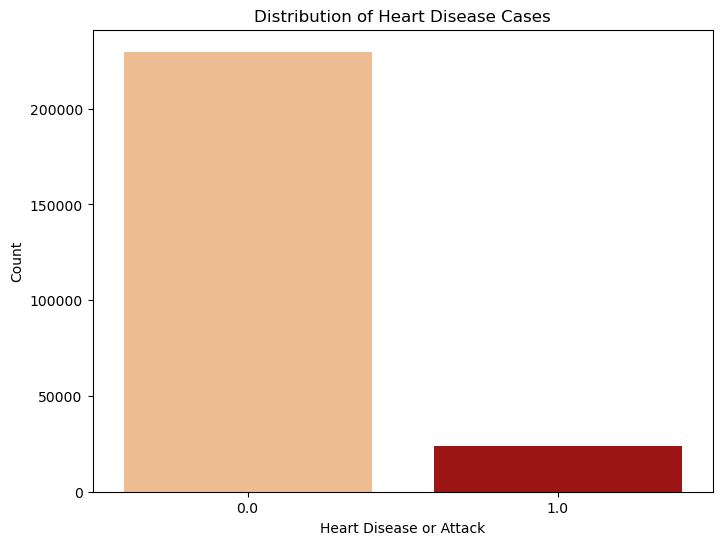

In [8]:
# Exploratory Data Analysis
# Distribution of Heart Disease Cases
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=heart_disease_cleaned_data, palette=['#fdbb84', '#b30000'])
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.show()

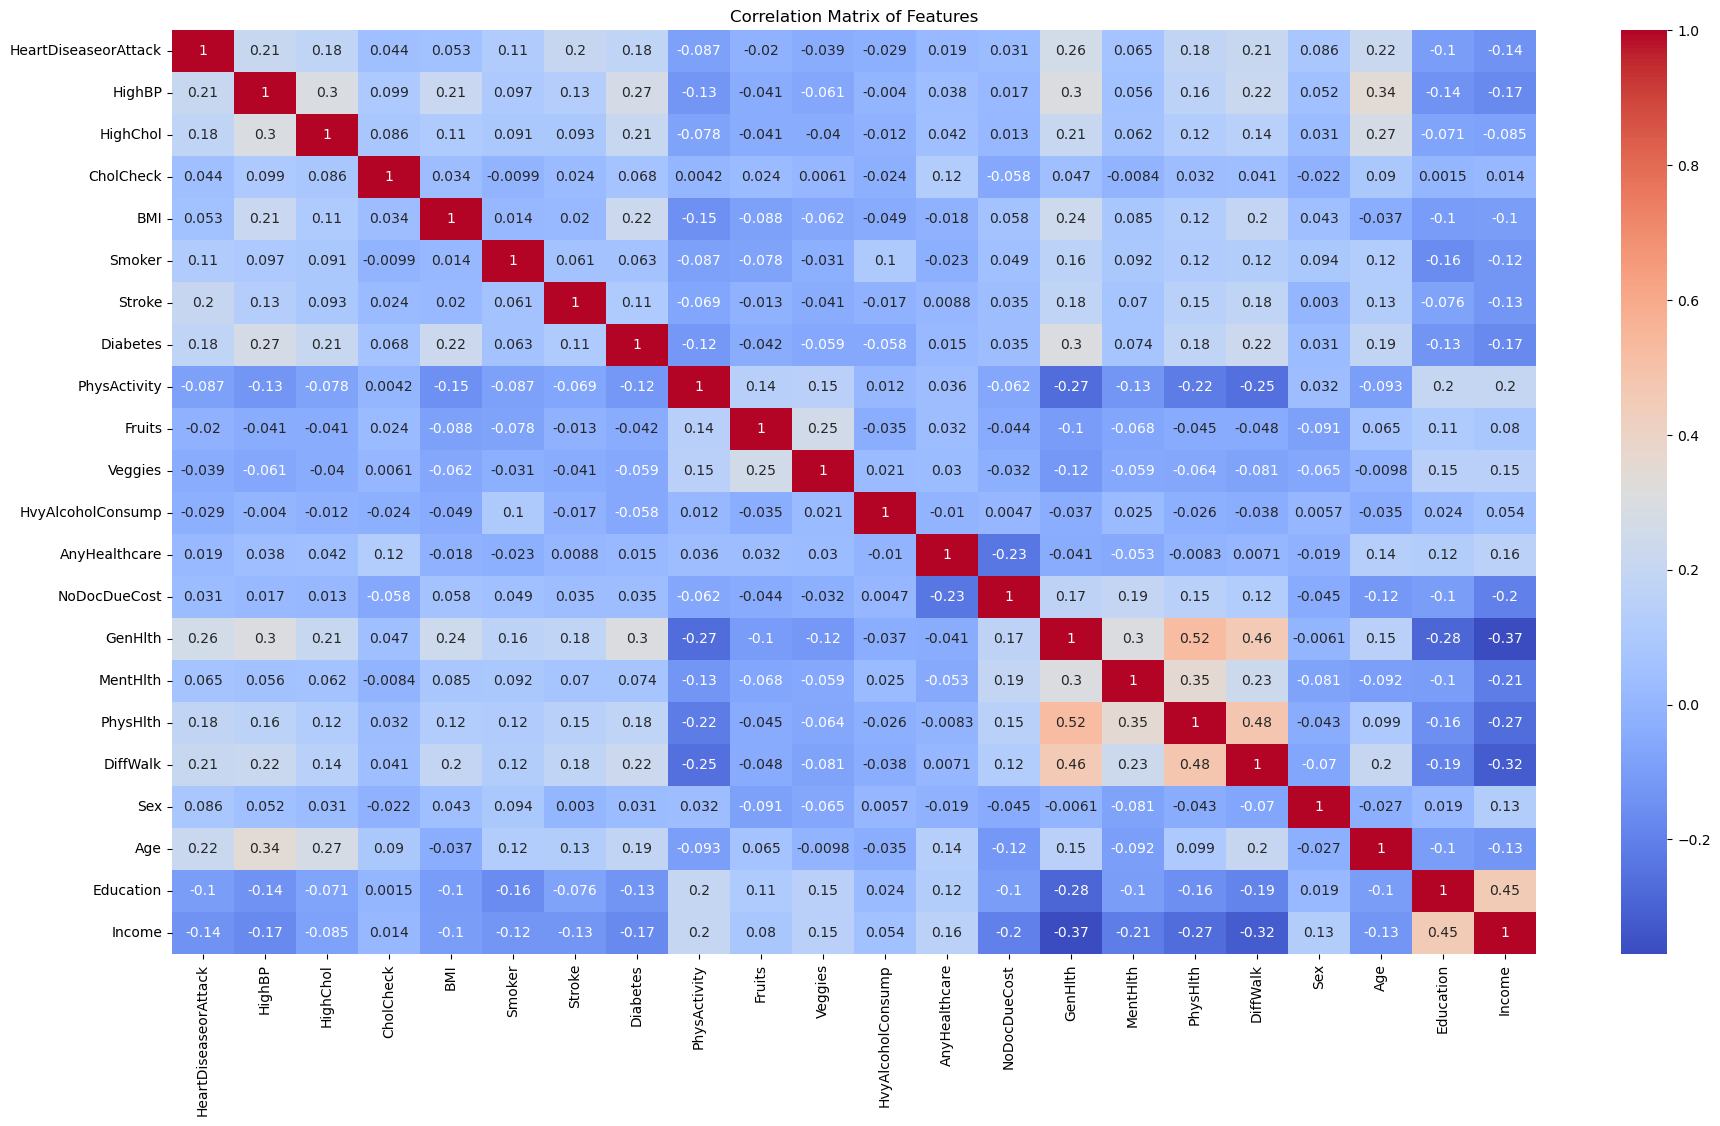

In [9]:
# Correlation Matrix
plt.figure(figsize=(22, 12))
correlation_matrix = heart_disease_cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

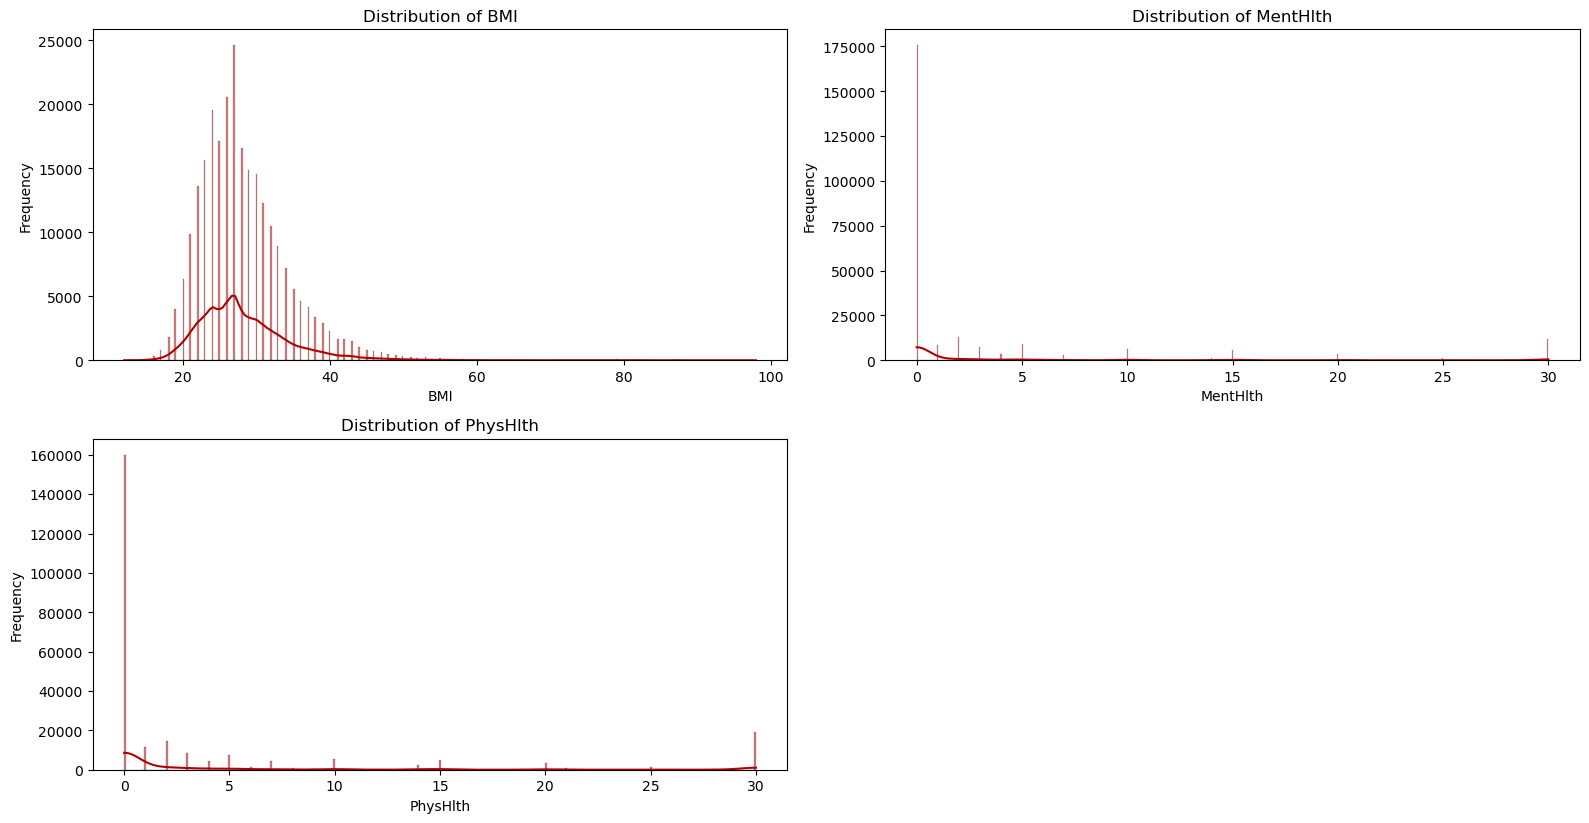

In [10]:
# List of Continuous Variables
continuous_variables = ['BMI', 'MentHlth', 'PhysHlth']

# Histograms
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_variables):
    plt.subplot(3, 2, i + 1)
    sns.histplot(heart_disease_cleaned_data[var], kde=True, color='#b30000')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

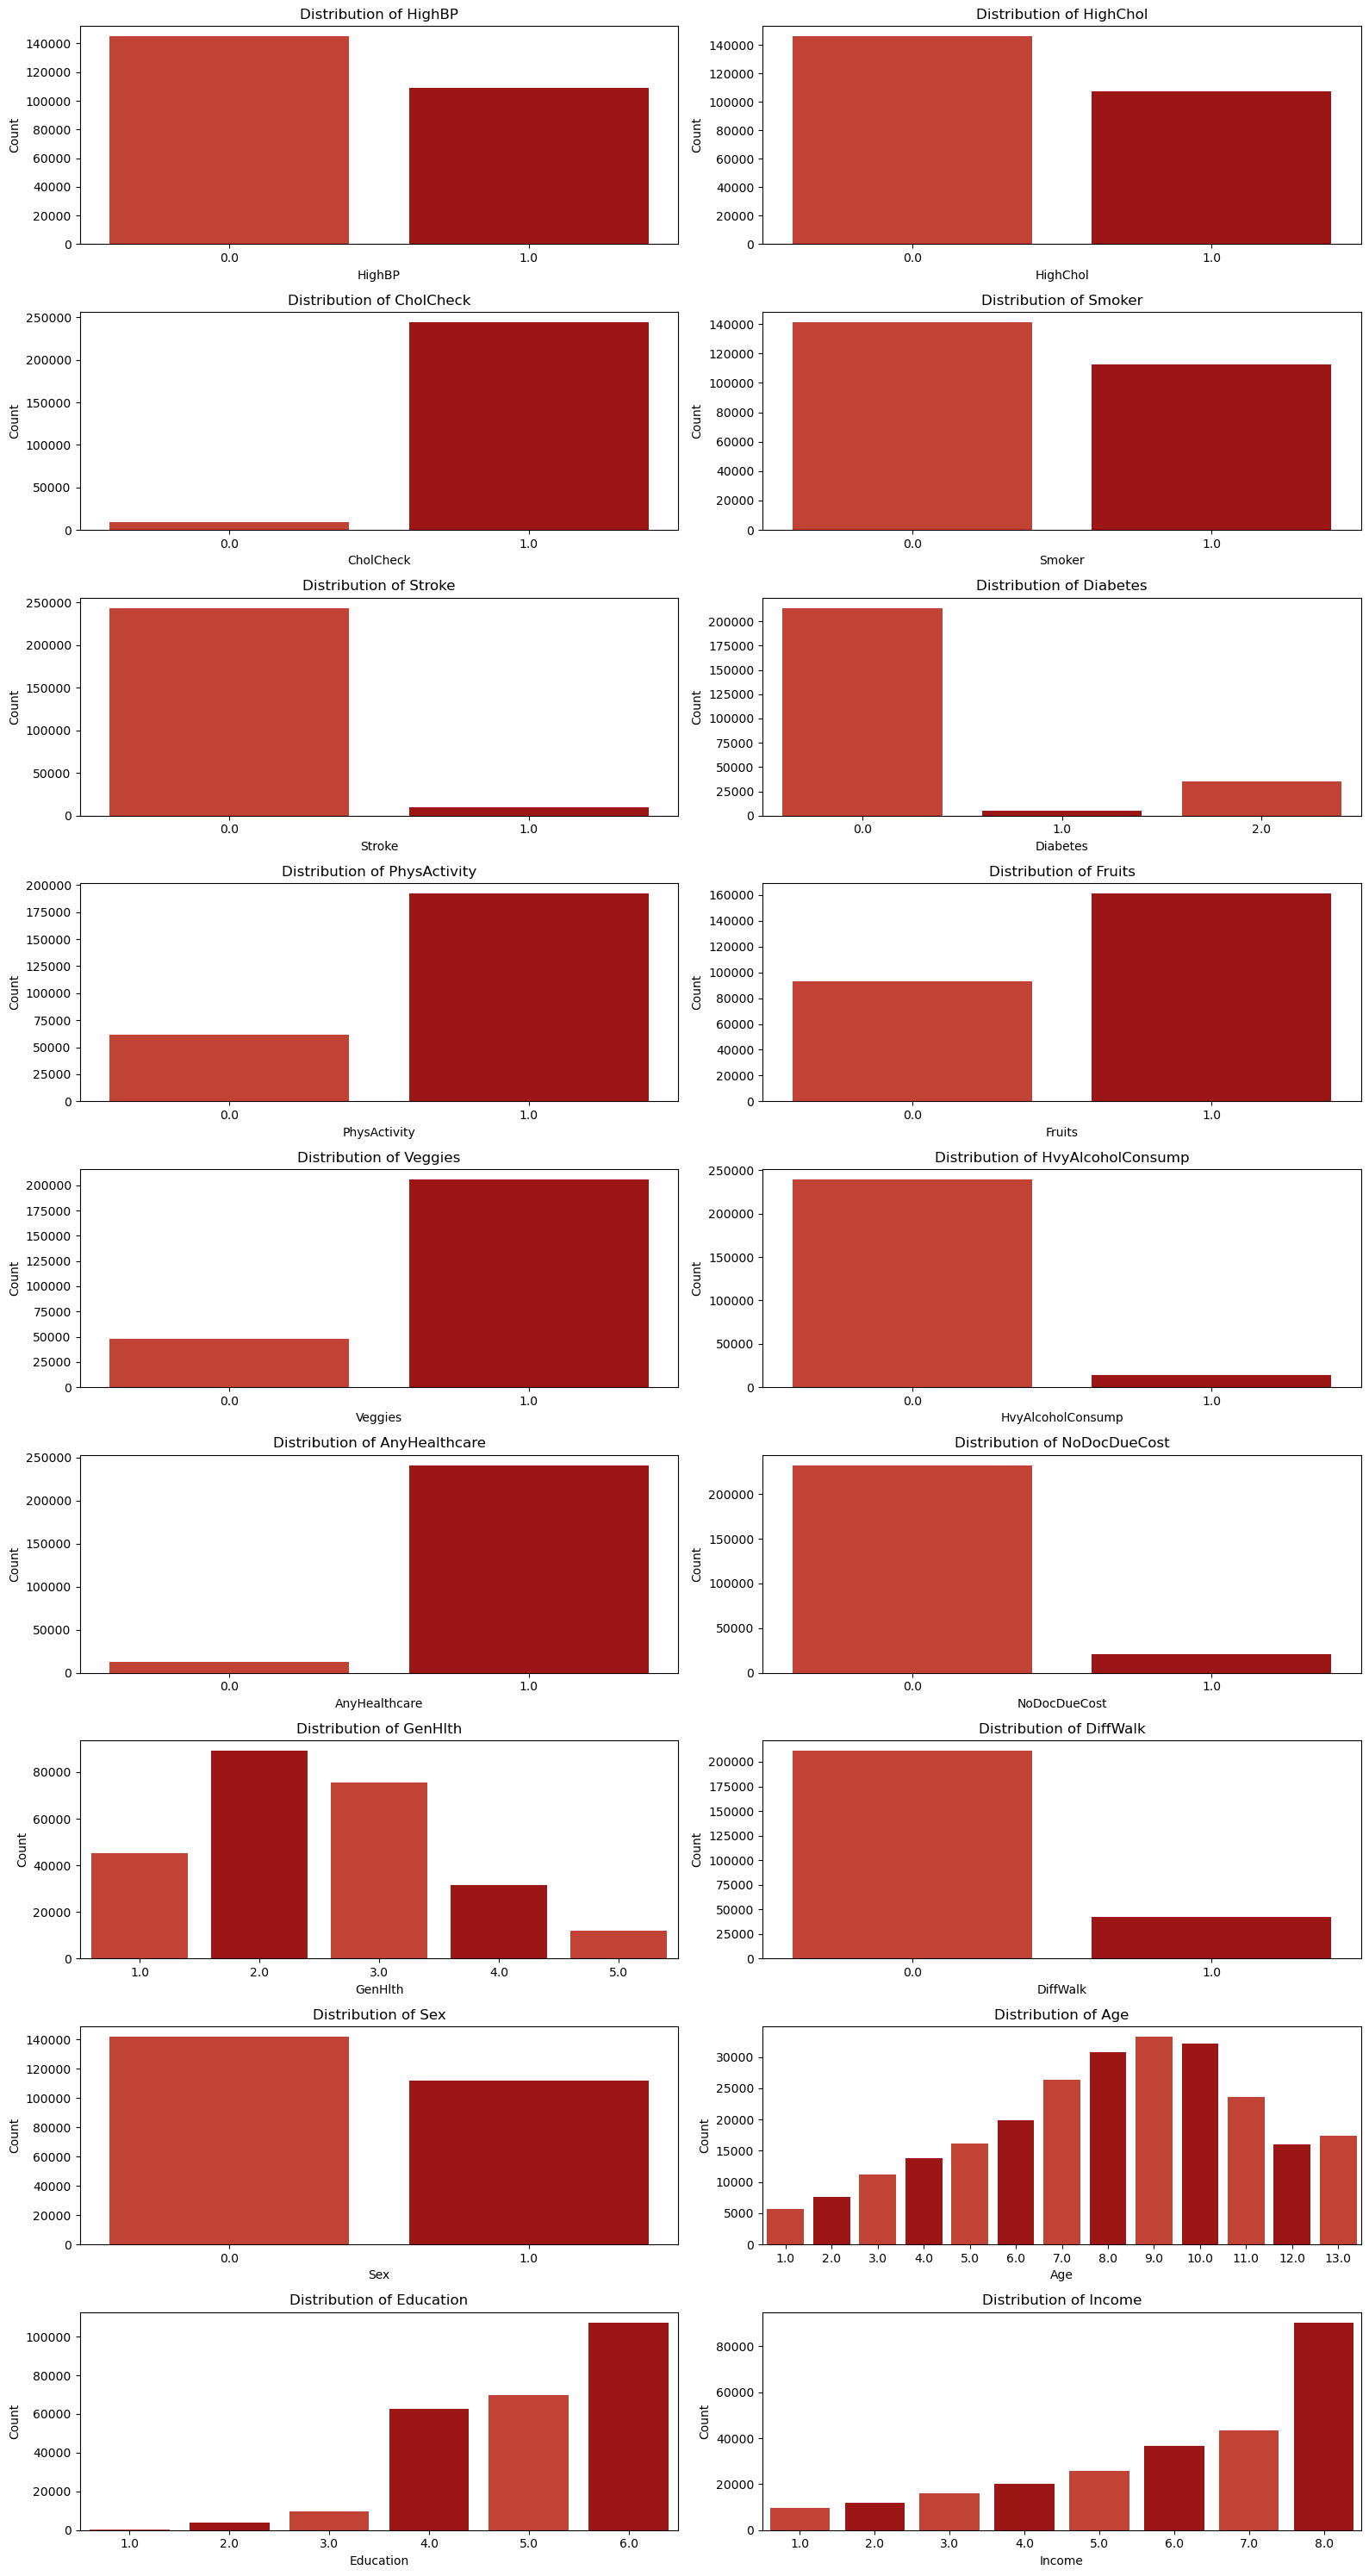

In [11]:
# List of Categorical Variables
categorical_variables = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes',
                         'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                         'NoDocDueCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Count Plots for Categorical Variables
plt.figure(figsize=(16, 30))
for i, var in enumerate(categorical_variables):
    plt.subplot(9, 2, i + 1)
    sns.countplot(x=var, data=heart_disease_cleaned_data, palette=['#d7301f', '#b30000'])
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
# Model Buidling
# Splitting Data into Training and Testing Sets
# Define Features and Target Variable
X = heart_disease_cleaned_data.drop('HeartDiseaseorAttack', axis=1)
y = heart_disease_cleaned_data['HeartDiseaseorAttack']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [13]:
# Initialize Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9062
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68790
         1.0       0.55      0.12      0.20      7314

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.57     76104
weighted avg       0.88      0.91      0.88     76104

Random Forest Accuracy: 0.9024
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68790
         1.0       0.47      0.11      0.18      7314

    accuracy                           0.90     76104
   macro avg       0.69      0.55      0.56     76104
weighted avg       0.87      0.90      0.87     76104

Neural Network Accuracy: 0.9063
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68790
         1.0       0.63      0.06      0.11      7314

    accuracy                           0.91     76104
   macro avg       0.77     

In [14]:
# Perform Cross-Validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}')

Logistic Regression Cross-Validation Accuracy: 0.9077
Random Forest Cross-Validation Accuracy: 0.9025
Neural Network Cross-Validation Accuracy: 0.9078
Naive Bayes Cross-Validation Accuracy: 0.8181
Decision Tree Cross-Validation Accuracy: 0.8505


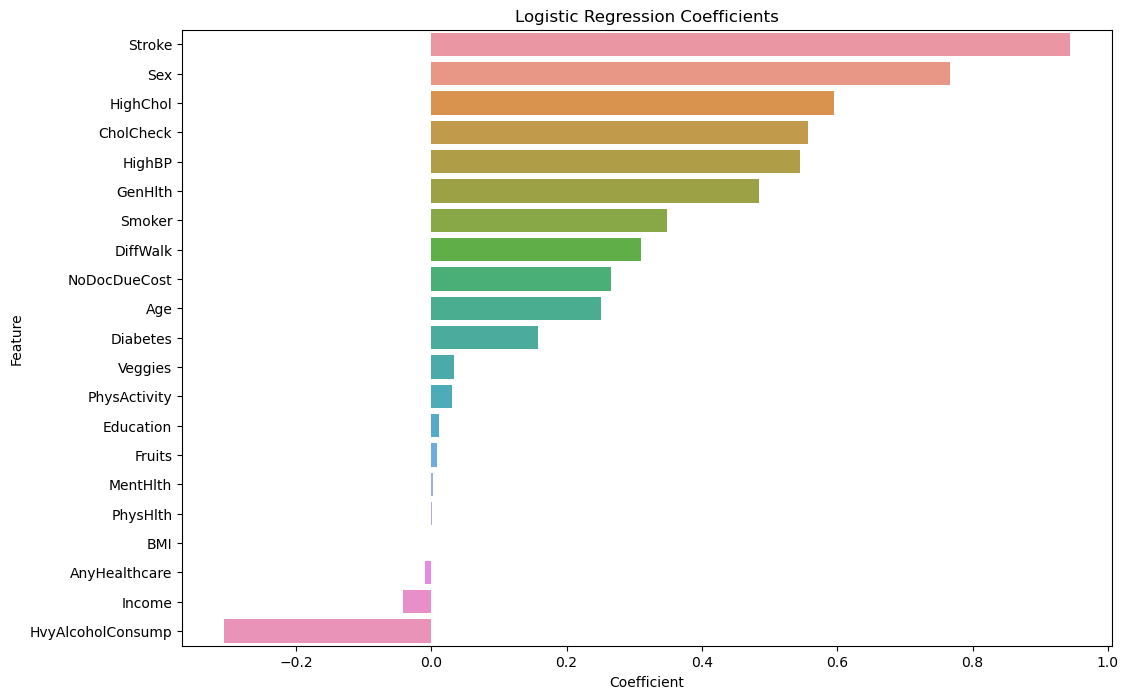

In [15]:
# Model Interpretation
# Logistic Regression
logistic_regression_model = models['Logistic Regression']
logistic_coefficients = logistic_regression_model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coefficients})

# Plot Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False))
plt.title('Logistic Regression Coefficients')
plt.show()

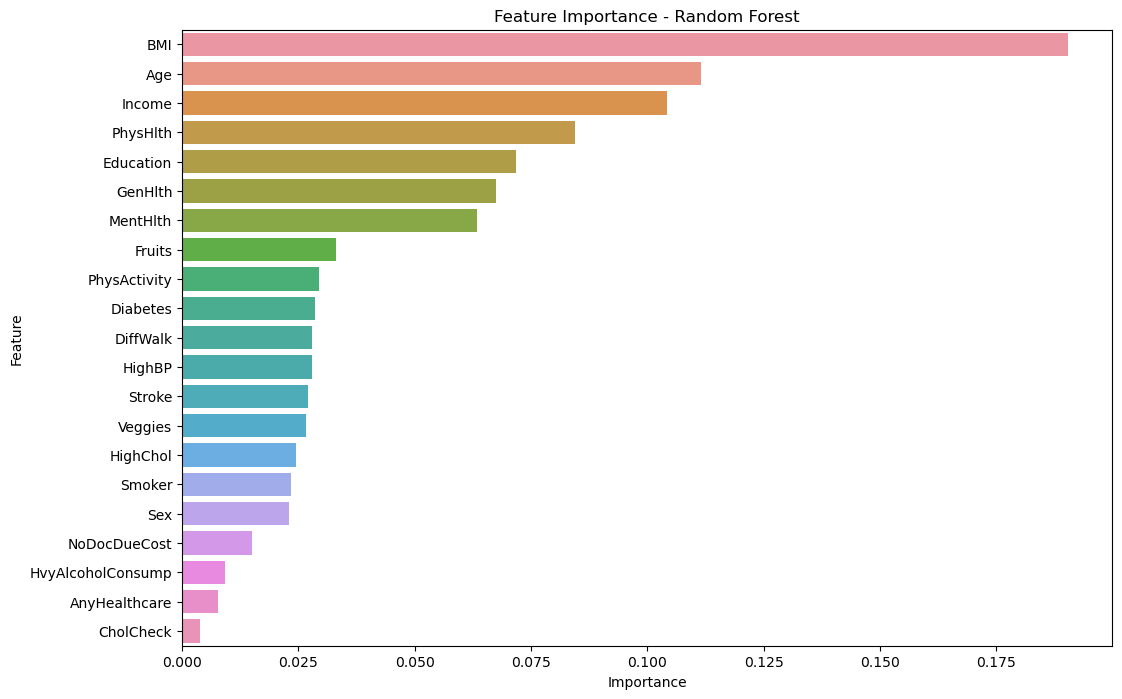

In [16]:
# Random Forest
random_forest_model = models['Random Forest']
rf_importances = random_forest_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

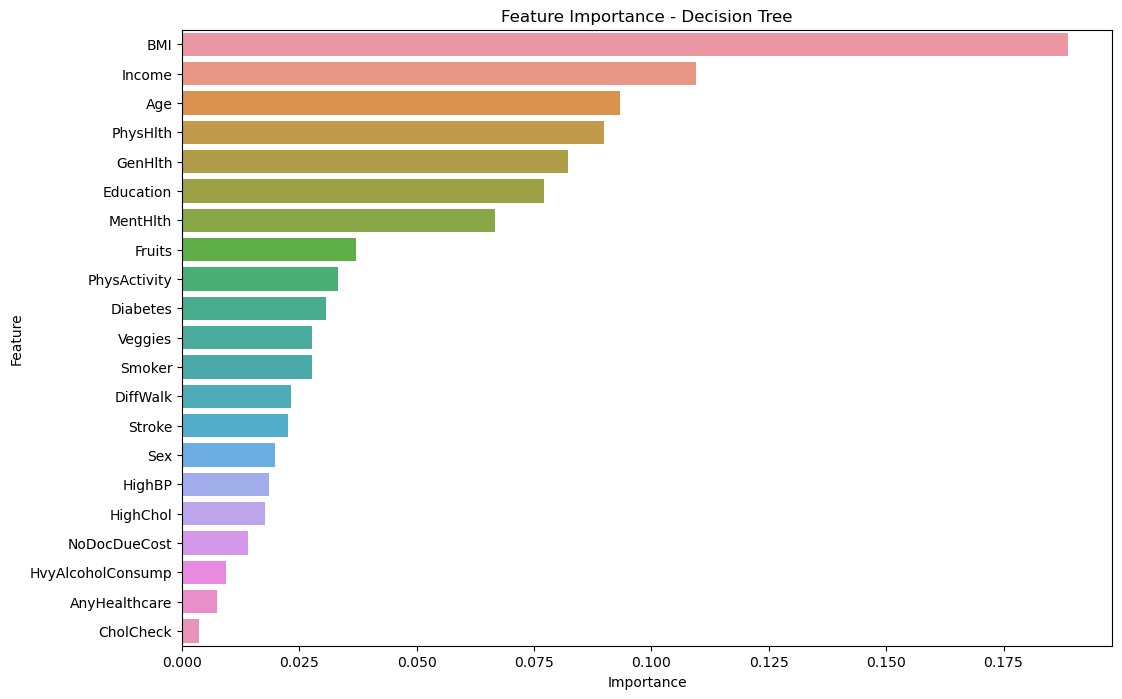

In [17]:
# Decision Tree
decision_tree_model = models['Decision Tree']
dt_importances = decision_tree_model.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df)
plt.title('Feature Importance - Decision Tree')
plt.show()